In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import tensorflow as tf

In [3]:
train_folder = "D:/Atharva/SECOND YEAR/Fourth sem/SD/Semantic segmentation/cityscapes_data/train"
test_folder = "D:/Atharva/SECOND YEAR/Fourth sem/SD/Semantic segmentation/cityscapes_data/val"

In [4]:
train_onlyfiles = [f for f in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, f))]
test_onlyfiles = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]

In [5]:
print("Working with {0} train images".format(len(train_onlyfiles)))
print("Working with {0} train images".format(len(test_onlyfiles)))

Working with 2975 train images
Working with 500 train images


In [5]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
train_files = []
test_files = []
train_img_arr = []
test_img_arr = []

In [7]:
i = 0

for _file in train_onlyfiles:
    train_files.append(_file)

for _file in test_onlyfiles:
    test_files.append(_file)

In [8]:
for _file in train_files:
    img = load_img(train_folder + "/" + _file)
    img.thumbnail((256, 512))
    #convert to np array
    x = img_to_array(img)
    train_img_arr.append(x)
    
for _file in test_files:
    img = load_img(test_folder + "/" + _file)
    img.thumbnail((256, 512))
    x = img_to_array(img)
    test_img_arr.append(x)

In [9]:
train_arr = np.array(train_img_arr)
test_arr = np.array(test_img_arr)

In [10]:
x_train = train_arr[:, :, 0:128, :]
y_train = train_arr[:, :, 128:256, :]
x_test = test_arr[:, :, 0:128, :]
y_test = test_arr[:, :, 128:256, :]

In [11]:
x_train = x_train/255
y_train = y_train/255
x_test = x_test/255
y_test = y_test/255

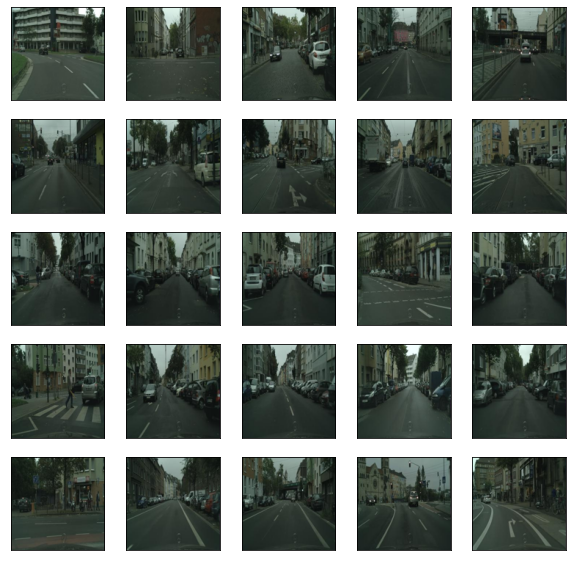

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

In [13]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate

# Convolutions

In [14]:
inputs = tf.keras.layers.Input((128, 128, 3))
start_neurons = 16
dropout_rate = 0.4
conv1 = Conv2D(start_neurons * 1, (3, 3), activation = "relu", padding = "same")(inputs)
conv1 = Conv2D(start_neurons * 1, (3, 3), activation = "relu", padding = "same")(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)
pool1 = Dropout(dropout_rate)(pool1)

In [15]:
conv2 = Conv2D(start_neurons * 2, (3, 3), activation = "relu", padding = "same")(pool1)
conv2 = Conv2D(start_neurons * 2, (3, 3), activation = "relu", padding = "same")(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)
pool2 = Dropout(dropout_rate)(pool2)

In [16]:
conv3 = Conv2D(start_neurons * 4, (3, 3), activation = "relu", padding = "same")(pool2)
conv3 = Conv2D(start_neurons * 4, (3, 3), activation = "relu", padding = "same")(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)
pool3 = Dropout(dropout_rate)(pool3)

In [17]:
conv4 = Conv2D(start_neurons * 8, (3, 3), activation = "relu", padding = "same")(pool3)
conv4 = Conv2D(start_neurons * 8, (3, 3), activation = "relu", padding = "same")(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)
pool4 = Dropout(dropout_rate)(pool4)

In [18]:
conv5 = Conv2D(start_neurons * 16, (3, 3), activation = "relu", padding = "same")(pool4)
conv5 = Conv2D(start_neurons * 16, (3, 3), activation = "relu", padding = "same")(conv5)
pool5 = MaxPooling2D((2, 2))(conv5)
pool5 = Dropout(dropout_rate)(pool5)

# Middle

In [19]:
convm = Conv2D(start_neurons * 32, (3, 3), activation = "relu", padding = "same")(pool5)
convm = Conv2D(start_neurons * 32, (3, 3), activation = "relu", padding = "same")(convm)

# Deconvolutions

In [20]:
deconv5 = Conv2DTranspose(start_neurons * 16, (3, 3), strides = (2, 2), padding = "same")(convm)
uconv5 = concatenate([deconv5, conv5])
uconv5 = Dropout(dropout_rate)(uconv5)
uconv5 = Conv2D(start_neurons * 16, (3, 3), activation = "relu", padding = "same")(uconv5)
uconv5 = Conv2D(start_neurons * 16, (3, 3), activation = "relu", padding = "same")(uconv5)

In [21]:
deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides = (2, 2), padding = "same")(uconv5)
uconv4 = concatenate([deconv4, conv4])
uconv4 = Dropout(dropout_rate)(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation = "relu", padding = "same")(uconv4)
uconv4 = Conv2D(start_neurons * 8, (3, 3), activation = "relu", padding = "same")(uconv4)

In [22]:
deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides = (2, 2), padding = "same")(uconv4)
uconv3 = concatenate([deconv3, conv3])
uconv3 = Dropout(dropout_rate)(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation = "relu", padding = "same")(uconv3)
uconv3 = Conv2D(start_neurons * 4, (3, 3), activation = "relu", padding = "same")(uconv3)

In [23]:
deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides = (2, 2), padding = "same")(uconv3)
uconv2 = concatenate([deconv2, conv2])
uconv2 = Dropout(dropout_rate)(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation = "relu", padding = "same")(uconv2)
uconv2 = Conv2D(start_neurons * 2, (3, 3), activation = "relu", padding = "same")(uconv2)

In [24]:
deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides = (2, 2), padding = "same")(uconv2)
uconv1 = concatenate([deconv1, conv1])
uconv1 = Dropout(dropout_rate)(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation = "relu", padding = "same")(uconv1)
uconv1 = Conv2D(start_neurons * 1, (3, 3), activation = "relu", padding = "same")(uconv1)

In [25]:
outputs = Conv2D(3, (1, 1), padding = "same", activation = 'sigmoid')(uconv1)

In [26]:
model = tf.keras.Model(inputs = [inputs], outputs = [outputs])
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [27]:
history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_test, y_test))

Epoch 1/40
93/93 [==============================] - 175s 2s/step - loss: 0.6615 - accuracy: 0.3979 - val_loss: 0.6351 - val_accuracy: 0.3984
Epoch 2/40
93/93 [==============================] - 172s 2s/step - loss: 0.6270 - accuracy: 0.3824 - val_loss: 0.5981 - val_accuracy: 0.5745
Epoch 3/40
93/93 [==============================] - 171s 2s/step - loss: 0.5997 - accuracy: 0.5029 - val_loss: 0.5887 - val_accuracy: 0.4777
Epoch 4/40
93/93 [==============================] - 171s 2s/step - loss: 0.5920 - accuracy: 0.5214 - val_loss: 0.5838 - val_accuracy: 0.5303
Epoch 5/40
93/93 [==============================] - 171s 2s/step - loss: 0.5894 - accuracy: 0.5543 - val_loss: 0.5838 - val_accuracy: 0.5514
Epoch 6/40
93/93 [==============================] - 171s 2s/step - loss: 0.5855 - accuracy: 0.5856 - val_loss: 0.5776 - val_accuracy: 0.6846
Epoch 7/40
93/93 [==============================] - 171s 2s/step - loss: 0.5814 - accuracy: 0.6231 - val_loss: 0.5740 - val_accuracy: 0.6194
Epoch 8/40
93

In [28]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(x_test)

In [30]:
predictions[0].shape

(128, 128, 3)

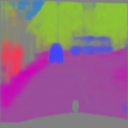

In [41]:
tf.keras.preprocessing.image.array_to_img(predictions[1])

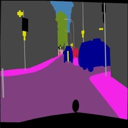

In [38]:
tf.keras.preprocessing.image.array_to_img(y_test[0])